<a href="https://colab.research.google.com/github/Lukatlina/-/blob/main/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
# 시각화시 한국어가 보이도록 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,197 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
* box_off_num : 관객수

In [ ]:
movies_train = '/content/drive/MyDrive/practice/movie/movies_train.csv'
movies_test = '/content/drive/MyDrive/practice/movie/movies_test.csv'
submission = '/content/drive/MyDrive/practice/movie/submission.csv'

In [ ]:
train_df = pd.read_csv(movies_train)
train_df[:5]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train_df.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [ ]:
test_df = pd.read_csv(movies_test)
test_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
# 훈련 셋과 테스트 셋의 형태 확인
train_df.shape, test_df.shape

((600, 12), (243, 11))

# 데이터 탐색

In [ ]:
# 훈련 셋 정보 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
# 훈련 셋 통계량 확인
train_df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [ ]:
# 훈련 셋 null값 확인
train_df.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


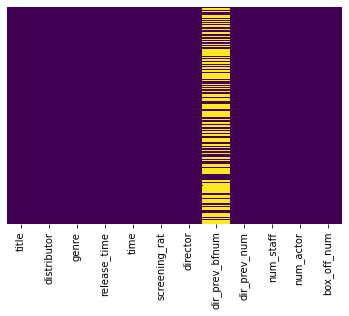

In [ ]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [ ]:
# 테스트 셋 null값 확인
test_df.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

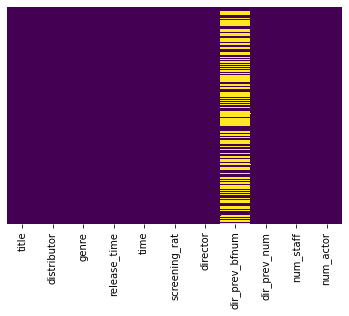

In [ ]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

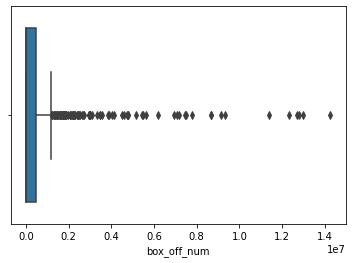

In [ ]:
# box_off_num 확인
sns.boxplot(x='box_off_num', data=train_df)
plt.show()

In [ ]:
# 훈련 셋 genre 확인 
train_df['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_

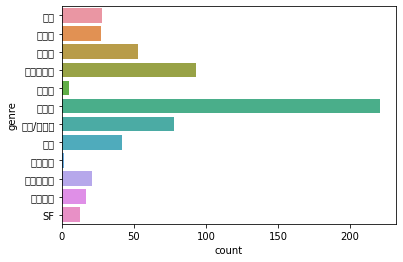

In [ ]:
# 훈련 셋 장르 갯수
sns.countplot(y='genre', data=train_df)
plt.show()

In [ ]:
train_df[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num', ascending=False)

,box_off_num
genre,
느와르,2263695.1
액션,2203974.1
SF,1788345.7
코미디,1193914.0
드라마,625689.8
공포,590832.5
미스터리,527548.2
멜로/로맨스,425968.0
애니메이션,181926.7


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_

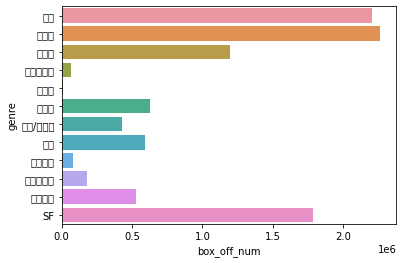

In [ ]:
# 훈련 셋 장르별 관객수
sns.barplot(x='box_off_num', y='genre', data=train_df, ci=False)
plt.show()

In [ ]:
train_df[['distributor', 'box_off_num']].groupby('distributor').mean().sort_values('box_off_num', ascending=False).head(10)

,box_off_num
distributor,
CJ E&M Pictures,4122337.0
(주)쇼박스,3386656.3
(주)아이필름코퍼레이션,3117859.0
쇼박스(주)미디어플렉스,2634823.0
영구아트무비,2541603.0
CJ E&M 영화부문,2505309.3
(주)NEW,2184404.8
CJ 엔터테인먼트,2162742.5
이십세기폭스코리아(주),1637046.0


In [ ]:
train_df['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [ ]:
train_df[['director', 'box_off_num']].groupby('director').mean().sort_values('box_off_num', ascending=False).head(10)

,box_off_num
director,
윤제균,14262766.0
최동훈,12845252.0
양우석,11374879.0
봉준호,9350351.0
한재림,9135806.0
황동혁,8659725.0
이석훈,8212959.5
김한민,7482180.0
추창민,6986501.0


In [ ]:
# 배우의 수 별 관객 수 평균값
train_df[['num_actor', 'box_off_num']].groupby('num_actor').mean().sort_values('box_off_num', ascending=False)

,box_off_num
num_actor,
10,2833073.1
11,2609363.8
22,2057896.0
8,1564732.6
5,979365.2
3,761740.9
6,671745.6
4,650545.2
2,598755.1


In [ ]:
train_df[['num_actor','genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num', ascending=False)

,num_actor,box_off_num
genre,,
느와르,3.6,2263695.1
액션,3.6,2203974.1
SF,3.7,1788345.7
코미디,4.7,1193914.0
드라마,3.6,625689.8
공포,3.9,590832.5
미스터리,2.9,527548.2
멜로/로맨스,3.4,425968.0
애니메이션,5.7,181926.7


In [ ]:
train_df[['screening_rat', 'box_off_num']].groupby('screening_rat').mean().sort_values('box_off_num', ascending=False)

,box_off_num
screening_rat,
15세 관람가,1247518.6
12세 관람가,844980.9
청소년 관람불가,364181.3
전체 관람가,135100.5


In [ ]:
train_df['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

# 전처리

## Director_title

* title과 director를 버릴 생각이여서 고민한 끝에 변수 하나를 만들어 봄
* 어떻게 만들어야 할지 열심히 삽질을 하다가 결국에는 복잡하게 고생하는 방법으로 만들어 버림

In [ ]:
# 쉬운 전처리를 위해 합쳐줌
data_df = pd.concat([train_df, test_df], ignore_index=True)

In [ ]:
# 비어있는 부분을 모두 0으로 채워줌
data_df['dir_prev_bfnum'] = data_df['dir_prev_bfnum'].fillna(0)
data_df['box_off_num'] = data_df['box_off_num'].fillna(0)

In [ ]:
data_df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387.0
...,...,...,...,...,...,...,...,...,...,...,...,...
838,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4,0.0
839,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,0.0,0,18,2,0.0
840,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,0.0,0,224,4,0.0
841,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7,0.0


In [ ]:
data_df['dir_prev_bfnum'].isnull().sum()

0

In [ ]:
data_df['director_title'] = 0

In [ ]:
data_df.loc[(data_df['box_off_num'] < 1000000) | (data_df['dir_prev_bfnum'] < 1000000), 'director_title'] = 'Others'
data_df.loc[((data_df['box_off_num'] < 5000000) & (data_df['box_off_num'] >= 1000000)) | ((data_df['dir_prev_bfnum'] < 5000000) & (data_df['dir_prev_bfnum'] >= 1000000)), 'director_title'] = '백만감독'
data_df.loc[((data_df['box_off_num'] < 10000000) & (data_df['box_off_num'] >= 5000000)) | ((data_df['dir_prev_bfnum'] < 10000000) & (data_df['dir_prev_bfnum'] >= 5000000)), 'director_title'] = '오백만감독'
data_df.loc[(data_df['box_off_num'] >= 10000000) | (data_df['dir_prev_bfnum'] >= 10000000), 'director_title'] = '천만감독'

In [ ]:
# 값이 잘 들어가긴 했지만 각 감독의 중복된 작품에는 다른 값들이 들어가 있음
data_df['director_title'].value_counts()

Others    667
백만감독      145
오백만감독      24
천만감독        7
Name: director_title, dtype: int64

In [ ]:
data_df[data_df['director']=='류승완']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,director_title
44,부당거래,CJ 엔터테인먼트,느와르,2010-10-28,119,청소년 관람불가,류승완,0.0,0,471,4,2723028.0,백만감독
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,0.0,0,363,5,7166532.0,오백만감독
829,베테랑,CJ 엔터테인먼트,액션,2015-08-05,123,15세 관람가,류승완,97469.0,3,579,4,0.0,Others


In [ ]:
names = data_df.loc[data_df.director_title == '천만감독']['director'].values
names

array(['양우석', '고구마', '최동훈', '윤제균', '추창민', '최동훈', '이환경'], dtype=object)

In [ ]:
names2 = data_df.loc[data_df.director_title == '오백만감독']['director'].values
names2

array(['우민호', '장철수', '강형철', '이정범', '정우철', '한재림', '심형래', '김민석', '김지훈',
       '김한민', '이석훈', '장재현', '강형철', '성시흡', '김용화', '조의석', '황동혁', '나홍진',
       '봉준호', '이석훈', '허정', '류승완', '권혁재', '백상열'], dtype=object)

In [ ]:
for n in names:
    data_df.loc[data_df.director == n, 'director_title'] = '천만감독'

In [ ]:
data_df.loc[data_df.director_title == '천만감독']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,director_title
122,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,0.0,0,311,5,11374879.0,천만감독
157,챔프,(주)쇼박스,드라마,2011-09-07,133,12세 관람가,이환경,819049.5,2,92,4,535657.0,천만감독
244,그대를 사랑합니다,(주)NEW,드라마,2011-02-17,118,15세 관람가,추창민,1552541.0,2,304,4,1649407.0,천만감독
338,타부 : 금지된 사랑,고구마공작소,멜로/로맨스,2015-09-03,78,청소년 관람불가,고구마,17615314.0,1,27,3,8.0,천만감독
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2564691.7,3,462,10,12983841.0,천만감독
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0.0,0,869,4,14262766.0,천만감독
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1552541.0,2,402,3,12323595.0,천만감독
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5169479.0,4,628,3,12706663.0,천만감독
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,819049.5,2,300,8,12811435.0,천만감독


In [ ]:
for n in names2:
    data_df.loc[data_df.director == n, 'director_title'] = '오백만감독'

In [ ]:
data_df.loc[data_df.director_title == '오백만감독'].head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,director_title
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501.0,오백만감독
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083.0,오백만감독
16,써니,CJ E&M Pictures,코미디,2011-05-04,124,15세 관람가,강형철,8223342.0,1,572,11,7453715.0,오백만감독
44,부당거래,CJ 엔터테인먼트,느와르,2010-10-28,119,청소년 관람불가,류승완,0.0,0,471,4,2723028.0,오백만감독
58,파괴된 사나이,시너지,공포,2010-07-01,114,청소년 관람불가,우민호,0.0,0,290,5,1012310.0,오백만감독
63,간첩,롯데엔터테인먼트,드라마,2012-09-20,115,15세 관람가,우민호,1012310.0,1,372,5,1310895.0,오백만감독
74,아저씨,CJ 엔터테인먼트,액션,2010-08-04,119,청소년 관람불가,이정범,0.0,0,509,2,6178665.0,오백만감독
76,사랑이 무서워,롯데엔터테인먼트,멜로/로맨스,2011-03-10,112,15세 관람가,정우철,5849451.0,3,310,2,402876.0,오백만감독
101,관상,(주)쇼박스,드라마,2013-09-11,139,15세 관람가,한재림,1242778.0,2,298,6,9135806.0,오백만감독
118,라스트 갓파더,영구아트무비,코미디,2010-12-29,103,12세 관람가,심형래,7855474.0,1,31,5,2541603.0,오백만감독


In [ ]:
names3 = data_df[data_df.director_title == '백만감독']['director'].values
names3

array(['임상윤', '이재용', '황인호', '전계수', '민규동', '최호', '곽경택', '손영성', '정기훈',
       '박재식', '김상만', '정기훈', '김대우', '송해성', '조근현', '김휘', '조근현', '신태라',
       '윤종빈', '박진표', '김덕수', '이재규', '김석윤', '장훈', '라희찬', '김영탁', '정승구',
       '이규만', '김회근', '김석윤', '홍지영', '박훈정', '정지영', '유하', '김태윤', '임상수',
       '강우석', '송해성', '방은진', '조동오', '강효진', '손재곤', '장규성', '황병국', '이수진',
       '류훈', '진모영', '김성수', '한동욱', '문제용', '김현석', '송일곤', '정영헌', '안상훈',
       '전윤수', '윤재근', '황인호', '허종호', '김현석', '김봉주', '김현석', '오성윤', '박희곤',
       '유정환', '김홍선', '이용주', '김상진', '김영탁', '이준익', '이연우', '임상수', '홍원찬',
       '문현성', '강우석', '조범구', '김상진', '김지운', '김대우', '장유정', '김정훈', '김휘', '노덕',
       '박정우', '이홍재', '허종호', '임찬상', '김성훈', '백종열', '박훈정', '김동원', '변영주',
       '정윤수', '민규동', '천성일', '안권태', '이근우', '김용균', '윤준형', '계윤식', '김대승',
       '폴 페이그', '이준익', '임순례', '정세교', '이재한', '국동석', '신정원', '유하', '한준희',
       '심성보', '윤종찬', '백운학', '강대규', '조명남', '강성룡', '정용기', '이한', '박훈정',
       '박홍수', '원신연', '이현종', '조진규', '이한', '창감독', '이용승', '이동삼', '김상만',
       '김홍선', '임상수', 

In [ ]:
for n in names3:
    data_df.loc[data_df.director == n, 'director_title'] = '백만감독'

In [ ]:
data_df[data_df['director_title']=='백만감독'].head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,director_title
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.0,3,342,2,1110523.0,백만감독
20,두근두근 내 인생,CJ 엔터테인먼트,드라마,2014-09-03,117,12세 관람가,이재용,495068.5,2,466,3,1624573.0,백만감독
26,이웃집 좀비,인디스토리,공포,2010-02-18,89,15세 관람가,류훈,0.0,0,40,10,2807.0,백만감독
34,오싹한 연애,CJ 엔터테인먼트,멜로/로맨스,2011-12-01,114,12세 관람가,황인호,683213.3,3,324,2,3009406.0,백만감독
39,러브픽션,NEW,멜로/로맨스,2012-02-29,121,15세 관람가,전계수,8052.5,2,315,2,1726227.0,백만감독
41,끝과 시작,롯데엔터테인먼트,멜로/로맨스,2013-04-04,87,청소년 관람불가,민규동,4598985.0,1,182,3,38809.0,백만감독
48,빅매치,(주)NEW,액션,2014-11-26,112,15세 관람가,최호,1159954.0,2,600,4,1177435.0,백만감독
59,친구 2,롯데엔터테인먼트,느와르,2013-11-14,124,청소년 관람불가,곽경택,372863.0,2,319,3,2971475.0,백만감독
66,의뢰인,(주)쇼박스,드라마,2011-09-29,123,15세 관람가,손영성,39555.0,1,68,3,2393103.0,백만감독
67,열정같은소리하고있네,(주)NEW,드라마,2015-11-25,106,15세 관람가,정기훈,1502930.2,4,341,2,654407.0,백만감독


In [ ]:
data_df.director_title.value_counts()

Others    632
백만감독      167
오백만감독      35
천만감독        9
Name: director_title, dtype: int64

In [ ]:
data_df[data_df['director']=='류승완']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,director_title
44,부당거래,CJ 엔터테인먼트,느와르,2010-10-28,119,청소년 관람불가,류승완,0.0,0,471,4,2723028.0,오백만감독
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,0.0,0,363,5,7166532.0,오백만감독
829,베테랑,CJ 엔터테인먼트,액션,2015-08-05,123,15세 관람가,류승완,97469.0,3,579,4,0.0,오백만감독


* 값들이 잘 들어간 것을 확인 할 수 있다.

## distributor

* 중요한 변수로 작용할 수 있을거라 생각했으나 종류가 너무 많고 어떻게 나눌 것인지가 불분명함.
* 앞에서 만든 director_title을 기준으로 distributor를 조회해보고 적절히 구간화를 해보려고 한다.

In [ ]:
# 모든 distributor의 이름 -> 다 아는 건 아니지만 몇몇 같은 회사로 보이는 곳의 이름을 일치시켜 준다.
data_df['distributor'].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [ ]:
data_df['distributor'] = data_df['distributor'].replace(['CJ 엔터테인먼트', 'CJ CGV','CGV 무비꼴라쥬', 'CGV아트하우스', 'CGV 아트하우스', 'CJ E&M 영화부문', 'CJ E&M Pictures', 'tvN'], 'CJ')
data_df['distributor'] = data_df['distributor'].replace(['쇼박스(주)미디어플렉스','(주)쇼박스'], '쇼박스')
data_df['distributor'] = data_df['distributor'].replace('(주)NEW', 'NEW')
data_df['distributor'] = data_df['distributor'].replace(['메가박스(주)플러스엠', '메가박스중앙(주)플러스엠'], '메가박스')
data_df['distributor'] = data_df['distributor'].replace(['롯데엔터테인먼트', '롯데쇼핑(주)롯데엔터테인먼트'], '롯데')
data_df['distributor'] = data_df['distributor'].replace(['KT', 'KT&G 상상마당'], 'KT')
data_df['distributor'] = data_df['distributor'].replace(['(주)마운틴픽쳐스', '마운틴픽쳐스', '(주)씨타마운틴픽쳐스'], '마운틴')

In [ ]:
data_df['distributor'].unique()[:10]

array(['롯데', '쇼박스', 'NEW', '백두대간', '유니버설픽쳐스인터내셔널코리아', '(주)두타연',
       '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이', '(주)팝 파트너스'], dtype=object)

In [ ]:
# 천만감독을 기준으로 봤을 때의 distributor와 갯수
data_df[data_df['director_title']=='천만감독']['distributor'].value_counts()

NEW       3
쇼박스       3
CJ        2
고구마공작소    1
Name: distributor, dtype: int64

In [ ]:
# 오백만감독을 기준으로 봤을 때의 distributor와 갯수
data_df[data_df['director_title']=='오백만감독']['distributor'].value_counts()

CJ          15
쇼박스          6
롯데           6
NEW          4
시너지          1
영구아트무비       1
스폰지이엔티       1
골든타이드픽처스     1
Name: distributor, dtype: int64

In [ ]:
# 백만감독을 기준으로 봤을 때의 distributor와 갯수
data_df[data_df['director_title']=='백만감독']['distributor'].value_counts().head()

CJ     37
롯데     36
쇼박스    20
NEW    19
시너지     4
Name: distributor, dtype: int64

In [ ]:
# 전체 데이터 기준 distributor top 10
data_df['distributor'].value_counts().head(10)

CJ           103
롯데            77
NEW           48
마운틴           45
쇼박스           42
인디스토리         37
골든타이드픽처스      27
(주) 케이알씨지     19
KT            17
(주)키노아이       15
Name: distributor, dtype: int64

* CJ, 롯데, NEW, 쇼박스, 시너지가 주로 보이는 것을 확인할 수 있다. 이 값들을 제외하고 나머지는 모두 같은 값으로 처리한다.

In [ ]:
idx = data_df['distributor'].value_counts().index
dis_name = ['CJ','롯데','NEW','쇼박스','시너지']

for x in idx:
    for i, d in enumerate(dis_name):
        if x == d:
            data_df.loc[data_df['distributor']==x, 'distributor'] = i + 1
        elif x in dis_name:
            pass
        else:
            data_df.loc[data_df['distributor']==x, 'distributor'] = 0

In [ ]:
# 기타, 'CJ','롯데','NEW','쇼박스','시너지' 순으로 구간화 완료
data_df['distributor'].value_counts()

0    562
1    103
2     77
3     48
4     42
5     11
Name: distributor, dtype: int64

In [ ]:
data_df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,director_title
0,개들의 전쟁,2,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398.0,Others
1,내부자들,4,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501.0,오백만감독
2,은밀하게 위대하게,4,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083.0,오백만감독
3,나는 공무원이다,3,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866.0,Others
4,불량남녀,4,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387.0,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,해에게서 소년에게,0,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4,0.0,Others
839,울보 권투부,0,다큐멘터리,2015-10-29,86,12세 관람가,이일하,0.0,0,18,2,0.0,Others
840,어떤살인,0,느와르,2015-10-28,107,청소년 관람불가,안용훈,0.0,0,224,4,0.0,Others
841,말하지 못한 비밀,0,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7,0.0,Others


## release_time

In [ ]:
# release_time을 날짜타입으로 변환
data_df['release_time'] = pd.to_datetime(data_df['release_time'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           843 non-null    object        
 1   distributor     843 non-null    object        
 2   genre           843 non-null    object        
 3   release_time    843 non-null    datetime64[ns]
 4   time            843 non-null    int64         
 5   screening_rat   843 non-null    object        
 6   director        843 non-null    object        
 7   dir_prev_bfnum  843 non-null    float64       
 8   dir_prev_num    843 non-null    int64         
 9   num_staff       843 non-null    int64         
 10  num_actor       843 non-null    int64         
 11  box_off_num     843 non-null    float64       
 12  director_title  843 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 85.7+ KB


In [ ]:
# 연도별 관객 수를 확인하고자 훈련 데이터를 따로 변경해서 확인해줌
# 관객 수를 계산하는 문제이기 때문에 test 데이터를 빼고 봄
train_df['release_time'] = pd.to_datetime(train_df['release_time'])

In [ ]:
t_y = train_df.set_index('release_time').resample('Y', origin='start')['box_off_num'].mean()
t_y

release_time
2010-12-31    541658.2
2011-12-31    628867.1
2012-12-31    945725.2
2013-12-31   1007357.8
2014-12-31    593884.5
2015-12-31    595869.2
Freq: A-DEC, Name: box_off_num, dtype: float64

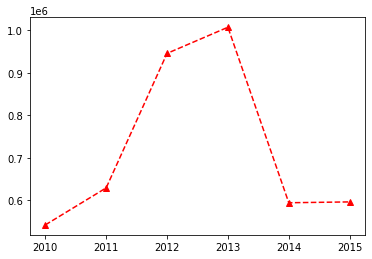

In [ ]:
# 훈련 셋 year별 관객 수 평균
plt.plot(np.arange(2010, 2016), t_y.values, 'r^--')
plt.show()

* 연도별로 관객 수가 많이 차이나기 때문에 따로 파생 변수를 만들어서 인코딩 예정

In [ ]:
# year와 Month 파생변수 추가
data_df['year'] = data_df['release_time'].dt.year
data_df['month'] = data_df['release_time'].dt.month

In [ ]:
data_df.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,director_title,year,month
0,개들의 전쟁,2,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398.0,Others,2012,11
1,내부자들,4,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501.0,오백만감독,2015,11
2,은밀하게 위대하게,4,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083.0,오백만감독,2013,6
3,나는 공무원이다,3,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866.0,Others,2012,7
4,불량남녀,4,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387.0,Others,2010,11


In [ ]:
# resample로는 원하는대로 보는 것에 한계가 있어서 훈련 셋에 컬럼을 따로 생성 후 확인함
# 월별 평균 관객 수 계산
train_df['month'] = train_df['release_time'].dt.month
m_m = train_df.groupby(['month'])['box_off_num'].mean()
m_m

month
1    1365930.6
2     663025.2
3     273887.4
4     258166.7
5     575685.2
6     512286.5
7    1113807.2
8    1029161.7
9     731528.6
10    385904.2
11    495653.9
12   1288247.7
Name: box_off_num, dtype: float64

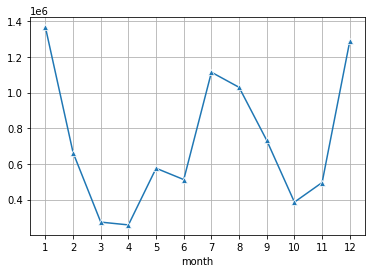

In [ ]:
sns.lineplot(x = m_m.index, y = m_m.values, marker='^')
plt.grid()
plt.xticks(np.arange(1,13,1))
plt.show()

* 월별로도 관객 수의 차이가 있는 것으로 보이기 때문에 파생변수를 유지하도록 한다.

## 변수 삭제

In [ ]:
# 필요없다고 생각되는 변수들을 삭제하자
data_df1 = data_df.drop(columns=['title', 'release_time', 'time', 'director'])
data_df1

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,director_title,year,month
0,2,액션,청소년 관람불가,0.0,0,91,2,23398.0,Others,2012,11
1,4,느와르,청소년 관람불가,1161602.5,2,387,3,7072501.0,오백만감독,2015,11
2,4,액션,15세 관람가,220775.2,4,343,4,6959083.0,오백만감독,2013,6
3,3,코미디,전체 관람가,23894.0,2,20,6,217866.0,Others,2012,7
4,4,코미디,15세 관람가,1.0,1,251,2,483387.0,Others,2010,11
...,...,...,...,...,...,...,...,...,...,...,...
838,0,드라마,15세 관람가,2590.0,1,4,4,0.0,Others,2015,11
839,0,다큐멘터리,12세 관람가,0.0,0,18,2,0.0,Others,2015,10
840,0,느와르,청소년 관람불가,0.0,0,224,4,0.0,Others,2015,10
841,0,드라마,청소년 관람불가,50699.0,1,68,7,0.0,Others,2015,10


In [ ]:
data_df1 = pd.get_dummies(data_df1, columns=['distributor', 'genre', 'screening_rat', 'dir_prev_num', 'director_title', 'year', 'month'])
data_df1[:3]

,dir_prev_bfnum,num_staff,num_actor,box_off_num,distributor_0,distributor_1,distributor_2,distributor_3,distributor_4,distributor_5,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.0,91,2,23398.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1161602.5,387,3,7072501.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,220775.2,343,4,6959083.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
data_df1['num_actor'] = np.log1p(data_df1['num_actor'])
data_df1['num_staff'] = np.log1p(data_df1['num_staff'])

ordinal_enc = OrdinalEncoder(cols='genre', 'screening_rat', 'director_title')
data_df1 = ordinal_enc.fit_transform(data_df1)

In [ ]:
data_df1

,dir_prev_bfnum,num_staff,num_actor,box_off_num,distributor_0,distributor_1,distributor_2,distributor_3,distributor_4,distributor_5,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.0,4.5,1.1,23398.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1161602.5,6.0,1.4,7072501.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,220775.2,5.8,1.6,6959083.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,23894.0,3.0,1.9,217866.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,5.5,1.1,483387.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,2590.0,1.6,1.6,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
839,0.0,2.9,1.1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
840,0.0,5.4,1.6,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
841,50699.0,4.2,2.1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y = data_df1.pop('box_off_num')
y_tr = y[:600]

In [ ]:
y_tr[-5:]

595   1475091.0
596   1716438.0
597      2475.0
598   2192525.0
599   7166532.0
Name: box_off_num, dtype: float64

In [ ]:
X_tr = data_df1[:600]
X_te = data_df1[600:]

In [ ]:
X_tr.shape, X_te.shape, y_tr.shape

((600, 54), (243, 54), (600,))

## 인코딩

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_validate

In [ ]:
knn = KNeighborsRegressor(n_jobs=-1)
dt = DecisionTreeRegressor()
lr = LinearRegression(n_jobs=-1)
sgd = SGDRegressor()
svr = SVR()
rf = RandomForestRegressor(n_jobs=-1)
xgb = XGBRegressor(n_jobs=-1)

model_name = [knn, dt, lr, sgd, svr, rf, xgb]

In [ ]:
# 모두 미사용시
tr_score = []
val_score = []
model_names = []
for m in model_name:
    cv = cross_validate(estimator=m,return_train_score=True, n_jobs=-1, cv=3, scoring='neg_mean_squared_error', X=X_tr, y=y_tr)
    tr_score.append(np.mean(cv['train_score']))
    val_score.append(np.mean(cv['test_score']))
    model_names.append(m.__class__.__name__)

model_df = pd.DataFrame({'Model name' : model_names,
                         'Train score' : tr_score,
                         'Validation score' : val_score})
model_df.sort_values(by='Validation score', ascending=False)

,Model name,Train score,Validation score
6,XGBRegressor,-146120879868.8,-1072512510559.4
5,RandomForestRegressor,-186822978505.2,-1115948338112.6
2,LinearRegression,-806846252856.1,-1280218928916.2
1,DecisionTreeRegressor,0.0,-1708102202575.4
0,KNeighborsRegressor,-1973314186565.4,-2954212801336.2
4,SVR,-3820141261910.5,-3820107156035.2
3,SGDRegressor,-9956074007014107594984732261780746112335872.0,-7009794582237600550602535306488036303306752.0


In [ ]:
# Standardscaler 사용 & Polynomial 사용
tr_score = []
val_score = []
model_names = []
for m in model_name:
    model = Pipeline([('poly', PolynomialFeatures(include_bias=False)),
                      ('scaler', StandardScaler()),
                      ('reg', m)])
    cv = cross_validate(estimator=m,return_train_score=True, n_jobs=-1,cv=3, scoring='neg_mean_squared_error', X=X_tr, y=y_tr)
    tr_score.append(-np.mean(cv['train_score']))
    val_score.append(-np.mean(cv['test_score']))
    model_names.append(m.__class__.__name__)

model_df = pd.DataFrame({'Model name' : model_names,
                         'Train score' : tr_score,
                         'Validation score' : val_score})
model_df.sort_values(by='Validation score')

,Model name,Train score,Validation score
6,XGBRegressor,146120879868.8,1072512510559.4
5,RandomForestRegressor,166849976857.0,1158103730351.4
2,LinearRegression,806846252856.1,1280218928916.2
1,DecisionTreeRegressor,-0.0,1731758969482.9
0,KNeighborsRegressor,1973314186565.4,2954212801336.2
4,SVR,3820141261910.5,3820107156035.2
3,SGDRegressor,8587718343114987086105171391507614255808512.0,10023169473441908383679983581632553373663232.0


In [ ]:
# Standardscaler 사용 & Polynomial 미사용
tr_score = []
val_score = []
model_names = []
for m in model_name:
    model = Pipeline([('scaler', StandardScaler()),
                      ('reg', m)])
    cv = cross_validate(estimator=m,return_train_score=True, n_jobs=-1, cv=3, scoring='neg_mean_squared_error', X=X_tr, y=y_tr)
    tr_score.append(-np.mean(cv['train_score']))
    val_score.append(-np.mean(cv['test_score']))
    model_names.append(m.__class__.__name__)

model_df = pd.DataFrame({'Model name' : model_names,
                         'Train score' : tr_score,
                         'Validation score' : val_score})
model_df.sort_values(by='Validation score', ascending=False)

,Model name,Train score,Validation score
6,XGBRegressor,-146120879868.8,-1072512510559.4
5,RandomForestRegressor,-169891718484.4,-1144234869058.4
2,LinearRegression,-806846252856.1,-1280218928916.2
1,DecisionTreeRegressor,0.0,-2195895169210.8
0,KNeighborsRegressor,-1973314186565.4,-2954212801336.2
4,SVR,-3820141261910.5,-3820107156035.2
3,SGDRegressor,-25159374360187854306679488790068864707723264.0,-16824496097088323006468331509288567989862400.0


In [ ]:
# MinMaxScaler 사용 & Polynomial 사용
tr_score = []
val_score = []
model_names = []
for m in model_name:
    model = Pipeline([('poly', PolynomialFeatures(include_bias=False)),
                      ('scaler', MinMaxScaler()),
                      ('reg', m)])
    cv = cross_validate(estimator=m,return_train_score=True, n_jobs=-1, cv=3, scoring='neg_mean_squared_error', X=X_tr, y=y_tr)
    tr_score.append(-np.mean(cv['train_score']))
    val_score.append(-np.mean(cv['test_score']))
    model_names.append(m.__class__.__name__)

model_df = pd.DataFrame({'Model name' : model_names,
                         'Train score' : tr_score,
                         'Validation score' : val_score})
model_df.sort_values(by='Validation score', ascending=False)

,Model name,Train score,Validation score
6,XGBRegressor,-146120879868.8,-1072512510559.4
5,RandomForestRegressor,-186938405133.7,-1151967093231.7
2,LinearRegression,-806846252856.1,-1280218928916.2
1,DecisionTreeRegressor,0.0,-1530203283257.5
0,KNeighborsRegressor,-1973314186565.4,-2954212801336.2
4,SVR,-3820141261910.5,-3820107156035.2
3,SGDRegressor,-5978238223661594485414568550400630185787392.0,-4280204688471054175482960574555132771958784.0


In [ ]:
# MinMaxScaler 사용 & Polynomial 미사용
tr_score = []
val_score = []
model_names = []
for m in model_name:
    model = Pipeline([('scaler', MinMaxScaler()),
                      ('reg', m)])
    cv = cross_validate(estimator=m,return_train_score=True, n_jobs=-1, cv=3, scoring='neg_mean_squared_error', X=X_tr, y=y_tr)
    tr_score.append(-np.mean(cv['train_score']))
    val_score.append(-np.mean(cv['test_score']))
    model_names.append(m.__class__.__name__)

model_df = pd.DataFrame({'Model name' : model_names,
                         'Train score' : tr_score,
                         'Validation score' :val_score})
model_df.sort_values(by='Validation score')

,Model name,Train score,Validation score
6,XGBRegressor,146120879868.8,1072512510559.4
5,RandomForestRegressor,195679569329.5,1195542537606.0
2,LinearRegression,806846252856.1,1280218928916.2
1,DecisionTreeRegressor,-0.0,1643964696542.0
0,KNeighborsRegressor,1973314186565.4,2954212801336.2
4,SVR,3820141261910.5,3820107156035.2
3,SGDRegressor,12554640945485764471801502557864623429648384.0,9270470899661826766071450953472781659930624.0


* 하이퍼 파라미터 조절을 안했을 때 그나마 점수가 괜찮은 모델이 Random forest, XGB이기 때문에 이렇게 4가지 모델의 파라미터를 조절해 보도록 하려고 한다.

In [ ]:
import cmath
cmath.sqrt (-1072512510559.4)

1035621.7989977809j

In [ ]:
np.sqrt(1072512510559.4)

1035621.7989977809

### Random Forest

In [ ]:
rf = RandomForestRegressor()
model = Pipeline([('scaler', MinMaxScaler()),
                  ('reg', rf)])
params = {'reg__n_estimators': np.arange(5, 20, 5),
          'reg__max_depth':np.arange(2, 10, 2),
          'reg__min_samples_split':np.arange(2, 20, 2),
          'reg__max_features':['sqrt', 'log2', None]}
grid_rf = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error')

In [ ]:
grid_rf.fit(X_tr, y_tr)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('reg', RandomForestRegressor())]),
             param_grid={'reg__max_depth': array([2, 4, 6, 8]),
                         'reg__max_features': ['sqrt', 'log2', None],
                         'reg__min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'reg__n_estimators': array([ 5, 10, 15])},
             scoring='neg_mean_squared_error')

In [ ]:
grid_rf.best_score_

-1119773491276.9402

In [ ]:
grid_rf.best_params_

{'reg__max_depth': 8,
 'reg__max_features': None,
 'reg__min_samples_split': 4,
 'reg__n_estimators': 10}

In [ ]:
xgb = XGBRegressor(n_jobs=-1)
model = Pipeline([('scaler', StandardScaler()),
                  ('reg', xgb)])
params = {'reg__n_estimators': np.arange(5, 20, 5),
          'reg__max_depth':np.arange(2, 10, 2)}
grid_xgb = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error')

In [ ]:
grid_xgb.fit(X_tr, y_tr)

[04:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('reg', XGBRegressor(n_jobs=-1))]),
             param_grid={'reg__max_depth': array([2, 4, 6, 8]),
                         'reg__n_estimators': array([ 5, 10, 15])},
             scoring='neg_mean_squared_error')

In [ ]:
grid_xgb.best_params_

{'reg__max_depth': 4, 'reg__n_estimators': 15}

In [ ]:
grid_xgb.best_score_

-1455160419471.9521

In [ ]:
model = Pipeline([('scaler', StandardScaler()),
                  ('reg', XGBRegressor(n_jobs=-1))])
model.fit(X_tr, y_tr)

pred = model.predict(X_te)

[04:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred

array([ 451612.34, 1155962.6 , 1167114.4 , 2545794.2 ,  329517.53],
      dtype=float32)

* 하이퍼 파라미터를 잘못 설정한건지 만지면 만질 수록 점수가 떨어지는 현상 발생
* 역시 회귀가 분류보다 좀 더 어렵다고 생각한다.
* 처음에는 데이터가 너무 재미없었는데 자꾸 생각하고 분석하다보니 처음보다는 더 잘 알게 되어서 자꾸 뜯어보게 되었다.
* 아직은 데이터 분석이 어렵다.

In [ ]:
submission = pd.read_csv(submission)

In [ ]:
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
submission['box_off_num'] = pred

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        243 non-null    object 
 1   box_off_num  243 non-null    float32
dtypes: float32(1), object(1)
memory usage: 3.0+ KB


In [ ]:
submission.to_csv('my_result_luka_xgb_reg.csv', index=False)